In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
# import argparse # https://github.com/pytorch/examples/blob/main/vae/main.py
import pandas as pd
import numpy as np
from torchvision import datasets, transforms
from tqdm import tqdm
from VAE import Conv_VAE

## Data

In [8]:
cuda2 = False # torch.cuda.is_available() can be used to check if a gpu is available - I just set it to False
batch_size2 = 128
log_interval2 = 10
epochs2 = 50

device = torch.device("cuda" if cuda2 else "cpu") # args.cuda
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda2 else {} # args.cuda

# Get train and test data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=False,
                  transform=transforms.ToTensor()),
    batch_size=batch_size2, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, download=False, transform=transforms.ToTensor()),
    batch_size=batch_size2, shuffle=True, **kwargs)


In [ ]:
# Define VAE model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc1a = nn.Linear(400, 100)
        self.fc21 = nn.Linear(100, 2) # Latent space of 2D
        self.fc22 = nn.Linear(100, 2) # Latent space of 2D
        self.fc3 = nn.Linear(2, 100) # Latent space of 2D
        self.fc3a = nn.Linear(100, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc1a(h1))
        return self.fc21(h2), self.fc22(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        h4 = F.relu(self.fc3a(h3))
        return torch.sigmoid(self.fc4(h4))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [10]:
"""# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD # -ELBO


def train(epoch):
    model.train() # so that everything has gradients and we can do backprop and so on...
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad() # "reset" gradients to 0 for text iteration
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward() # calc gradients
        train_loss += loss.item()
        optimizer.step() # backpropagation

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

model = VAE().to(device)
optimizer = optim.RAdam(model.parameters(), lr=1e-3)

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad(): # no_grad turns of gradients...
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


for epoch in tqdm(range(1, epochs2 + 1)):
    train(epoch)
    test(epoch)

torch.save(model.state_dict(), 'vae.pt')
print('saved')"""


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

====> Epoch: 1 Average loss: 7507.6786


  2%|█▋                                                                                 | 1/50 [00:22<17:58, 22.00s/it]

====> Test set loss: 1135.0731
====> Epoch: 2 Average loss: 712.9824


  4%|███▎                                                                               | 2/50 [00:43<17:31, 21.90s/it]

====> Test set loss: 510.6864
====> Epoch: 3 Average loss: 400.7391


  6%|████▉                                                                              | 3/50 [01:07<17:43, 22.63s/it]

====> Test set loss: 343.1122
====> Epoch: 4 Average loss: 331.4433


  8%|██████▋                                                                            | 4/50 [01:35<18:53, 24.63s/it]

====> Test set loss: 299.4856
====> Epoch: 5 Average loss: 278.6558


 10%|████████▎                                                                          | 5/50 [02:03<19:25, 25.90s/it]

====> Test set loss: 258.4652
====> Epoch: 6 Average loss: 230.3709


 12%|█████████▉                                                                         | 6/50 [02:30<19:24, 26.47s/it]

====> Test set loss: 204.5038
====> Epoch: 7 Average loss: 191.3429


 14%|███████████▌                                                                       | 7/50 [02:59<19:24, 27.08s/it]

====> Test set loss: 177.4643
====> Epoch: 8 Average loss: 176.7350


 16%|█████████████▎                                                                     | 8/50 [03:28<19:34, 27.96s/it]

====> Test set loss: 175.7041
====> Epoch: 9 Average loss: 173.8927


 18%|██████████████▉                                                                    | 9/50 [03:59<19:38, 28.75s/it]

====> Test set loss: 172.3468
====> Epoch: 10 Average loss: 170.9968


 20%|████████████████▍                                                                 | 10/50 [04:30<19:40, 29.52s/it]

====> Test set loss: 169.1703
====> Epoch: 11 Average loss: 168.8236


 22%|██████████████████                                                                | 11/50 [05:01<19:24, 29.85s/it]

====> Test set loss: 168.3265
====> Epoch: 12 Average loss: 166.9476


 24%|███████████████████▋                                                              | 12/50 [05:32<19:13, 30.36s/it]

====> Test set loss: 166.4826
====> Epoch: 13 Average loss: 165.8181


 26%|█████████████████████▎                                                            | 13/50 [06:05<19:04, 30.94s/it]

====> Test set loss: 165.0541
====> Epoch: 14 Average loss: 164.7751


 28%|██████████████████████▉                                                           | 14/50 [06:35<18:33, 30.92s/it]

====> Test set loss: 163.9686
====> Epoch: 15 Average loss: 163.9154


 30%|████████████████████████▌                                                         | 15/50 [07:06<18:00, 30.86s/it]

====> Test set loss: 162.9881
====> Epoch: 16 Average loss: 163.1186


 32%|██████████████████████████▏                                                       | 16/50 [07:36<17:16, 30.49s/it]

====> Test set loss: 163.3790
====> Epoch: 17 Average loss: 162.3831


 34%|███████████████████████████▉                                                      | 17/50 [08:06<16:43, 30.39s/it]

====> Test set loss: 162.8676
====> Epoch: 18 Average loss: 162.0646


 36%|█████████████████████████████▌                                                    | 18/50 [08:38<16:24, 30.78s/it]

====> Test set loss: 162.4610
====> Epoch: 19 Average loss: 161.3476


 38%|███████████████████████████████▏                                                  | 19/50 [09:11<16:16, 31.50s/it]

====> Test set loss: 161.1333
====> Epoch: 20 Average loss: 160.6503


 40%|████████████████████████████████▊                                                 | 20/50 [09:45<16:13, 32.45s/it]

====> Test set loss: 159.9403
====> Epoch: 21 Average loss: 160.0637


 42%|██████████████████████████████████▍                                               | 21/50 [10:16<15:27, 31.97s/it]

====> Test set loss: 162.1161
====> Epoch: 22 Average loss: 159.5563


 44%|████████████████████████████████████                                              | 22/50 [10:49<15:04, 32.30s/it]

====> Test set loss: 160.9821
====> Epoch: 23 Average loss: 159.0146


 46%|█████████████████████████████████████▋                                            | 23/50 [11:26<15:09, 33.68s/it]

====> Test set loss: 160.1037
====> Epoch: 24 Average loss: 158.5968


 48%|███████████████████████████████████████▎                                          | 24/50 [12:00<14:34, 33.65s/it]

====> Test set loss: 158.4916
====> Epoch: 25 Average loss: 158.3364


 50%|█████████████████████████████████████████                                         | 25/50 [12:32<13:50, 33.24s/it]

====> Test set loss: 157.8910
====> Epoch: 26 Average loss: 157.7652


 52%|██████████████████████████████████████████▋                                       | 26/50 [13:04<13:06, 32.78s/it]

====> Test set loss: 158.0416
====> Epoch: 27 Average loss: 157.4953


 54%|████████████████████████████████████████████▎                                     | 27/50 [13:33<12:06, 31.59s/it]

====> Test set loss: 157.5348
====> Epoch: 28 Average loss: 157.1823


 56%|█████████████████████████████████████████████▉                                    | 28/50 [14:04<11:34, 31.59s/it]

====> Test set loss: 157.5529
====> Epoch: 29 Average loss: 156.8845


 58%|███████████████████████████████████████████████▌                                  | 29/50 [14:35<10:55, 31.20s/it]

====> Test set loss: 156.9901
====> Epoch: 30 Average loss: 156.7478


 60%|█████████████████████████████████████████████████▏                                | 30/50 [15:06<10:26, 31.35s/it]

====> Test set loss: 157.4291
====> Epoch: 31 Average loss: 156.3199


 62%|██████████████████████████████████████████████████▊                               | 31/50 [15:37<09:54, 31.31s/it]

====> Test set loss: 157.5530
====> Epoch: 32 Average loss: 156.0116


 64%|████████████████████████████████████████████████████▍                             | 32/50 [16:08<09:18, 31.00s/it]

====> Test set loss: 156.5917
====> Epoch: 33 Average loss: 155.8375


 66%|██████████████████████████████████████████████████████                            | 33/50 [16:37<08:40, 30.62s/it]

====> Test set loss: 155.8829
====> Epoch: 34 Average loss: 155.4077


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [17:05<07:55, 29.71s/it]

====> Test set loss: 155.7248
====> Epoch: 35 Average loss: 155.2012


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [17:32<07:13, 28.88s/it]

====> Test set loss: 155.5896
====> Epoch: 36 Average loss: 154.9199


 72%|███████████████████████████████████████████████████████████                       | 36/50 [18:00<06:40, 28.64s/it]

====> Test set loss: 155.3908
====> Epoch: 37 Average loss: 154.6259


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [18:28<06:11, 28.56s/it]

====> Test set loss: 157.2372
====> Epoch: 38 Average loss: 154.4606


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [18:56<05:39, 28.28s/it]

====> Test set loss: 156.5655
====> Epoch: 39 Average loss: 154.5515


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [19:24<05:09, 28.16s/it]

====> Test set loss: 156.1011
====> Epoch: 40 Average loss: 154.1410


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [19:50<04:36, 27.61s/it]

====> Test set loss: 154.7923
====> Epoch: 41 Average loss: 154.0774


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [20:20<04:14, 28.28s/it]

====> Test set loss: 155.4660
====> Epoch: 42 Average loss: 153.6264


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [20:53<03:58, 29.78s/it]

====> Test set loss: 157.1582
====> Epoch: 43 Average loss: 153.8273


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [21:28<03:37, 31.10s/it]

====> Test set loss: 154.7686
====> Epoch: 44 Average loss: 153.3915


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [21:58<03:06, 31.02s/it]

====> Test set loss: 155.3745
====> Epoch: 45 Average loss: 153.3053


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [22:28<02:32, 30.59s/it]

====> Test set loss: 153.8528
====> Epoch: 46 Average loss: 153.0566


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [22:56<01:58, 29.73s/it]

====> Test set loss: 157.4458
====> Epoch: 47 Average loss: 152.8025


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [23:24<01:27, 29.28s/it]

====> Test set loss: 154.7583
====> Epoch: 48 Average loss: 152.9973


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [23:53<00:58, 29.09s/it]

====> Test set loss: 154.2176
====> Epoch: 49 Average loss: 152.6470


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [24:22<00:29, 29.07s/it]

====> Test set loss: 154.1907
====> Epoch: 50 Average loss: 152.6164


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [24:51<00:00, 29.84s/it]

====> Test set loss: 156.0638
saved


## Training

In [ ]:
model = VAE().to(device)
model.load_state_dict(torch.load('vae.pt'))

## Loading the saved (trained) model

In [3]:
conv_vae = Conv_VAE(28*28, 2, 28*28).to(device)
conv_vae.load_state_dict(torch.load('conv_vae.pt'))
print(conv_vae)

Conv_VAE(
  (encoder): conv_encoder(
    (conv_pool): Sequential(
      (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
    )
    (hidden): Linear(in_features=64, out_features=400, bias=True)
    (mu): Linear(in_features=400, out_features=2, bias=True)
    (sigma): Linear(in_features=400, out_features=2, bias=True)
  )
  (decoder): conv_decoder(
    (layers): Sequential(
      (0): Linear(in_features=2, out_features=400, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=400, out_features=784, bias=True)
      (3): Sigmoid()
    )
  )
)


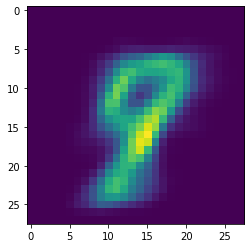

In [7]:
sample = torch.randn(1, 2).to(device)
sample = conv_vae.decoder(sample).cpu()
plt.imshow(sample.detach().numpy().reshape(28,28))
plt.show()

In [23]:
mnist_test = list(test_loader)
B = len(mnist_test)
results = torch.zeros((128*B,2))
all_labels = torch.empty(0)
l = 0
for b in range(B):
    labels = mnist_test[b][1]
    all_labels = torch.cat((all_labels, labels))
    
    images = mnist_test[b][0]
    K = images.shape[0]
    for k in range(K):
        an_img = images[k,:,:,:]
        mean_img = conv_vae.encoder(an_img)[0]
        results[l] = mean_img
        l +=1
results = results[:l,:]
all_labels = all_labels[:l]

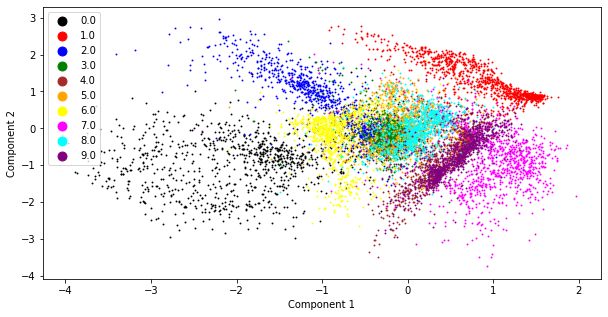

In [24]:
results_for_plot = results.detach().numpy()

scatter_x = results_for_plot[:,0]
scatter_y = results_for_plot[:,1]
group = all_labels

cdict = {0: 'black', 1: 'red', 2: 'blue', 3: 'green', 4: 'brown', 
         5: 'orange', 6: 'yellow', 7: 'magenta', 8: 'cyan', 9: 'purple'}

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 0.8)
ax.legend(markerscale = 10)
plt.show()

In [11]:
mnist_test = list(test_loader)
B = len(mnist_test)
results = torch.zeros((128*B,2))
all_labels = torch.empty(0)
l = 0
for b in range(B):
    labels = mnist_test[b][1]
    all_labels = torch.cat((all_labels, labels))
    
    images = mnist_test[b][0]
    K = images.shape[0]
    for k in range(K):
        an_img = images[k,:,:,:]
        an_img_flat = torch.flatten(an_img)
        mean_img = model.encode(an_img_flat)[0]
        results[l] = mean_img
        l +=1
results = results[:l,:]
all_labels = all_labels[:l]

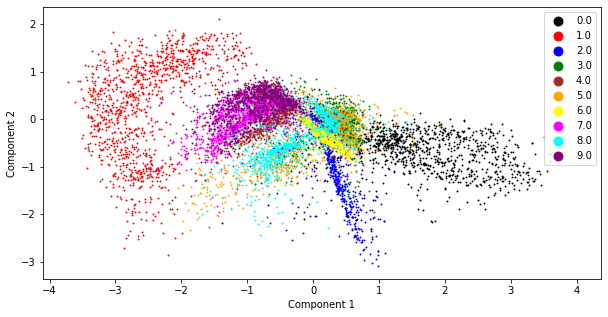

In [20]:
results_for_plot = results.detach().numpy()

scatter_x = results_for_plot[:,0]
scatter_y = results_for_plot[:,1]
group = all_labels

cdict = {0: 'black', 1: 'red', 2: 'blue', 3: 'green', 4: 'brown', 
         5: 'orange', 6: 'yellow', 7: 'magenta', 8: 'cyan', 9: 'purple'}

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 0.8)
ax.legend(markerscale = 10)
plt.show()

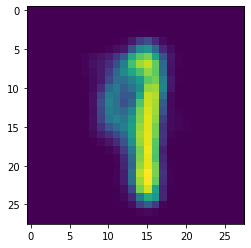

In [22]:
sample = torch.randn(1, 2).to(device)
sample = model.decode(sample).cpu()
plt.imshow(sample.detach().numpy().reshape(28,28))
plt.show()

In [25]:
M = 12
x = torch.linspace(start=0, end=1, steps=M+2)
x = x[:-1]
x = x[1:]

mesh_x, mesh_y = torch.meshgrid(x, x)
gauss = torch.distributions.normal.Normal(loc = 0, scale = 1)
gauss_x = gauss.icdf(mesh_x)#.flip(0)
gauss_y = gauss.icdf(mesh_y)

C:\Users\ROG\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


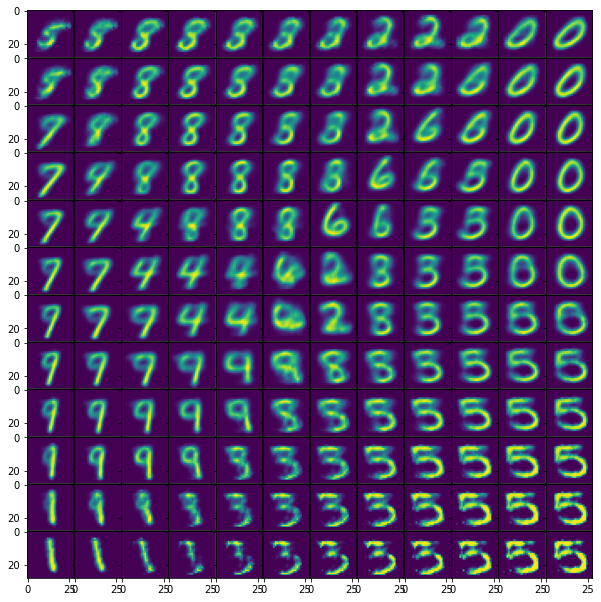

In [26]:
fig, ax = plt.subplots(nrows=M, ncols=M, figsize=(8, 8), sharex = True, sharey = True)
for i in range(M):
    for j in range(M):
        x_val = gauss_x[i,j].item()
        y_val = gauss_y[i,j].item()
        im = model.decode(torch.Tensor([y_val, x_val]))
        im_plt = im.reshape((28,28))
        plot_me = im_plt.detach().numpy()
        ax[i,j].imshow(plot_me)

slim=0.6
plt.tight_layout(pad=-slim, w_pad=-slim, h_pad=-slim)
plt.show()

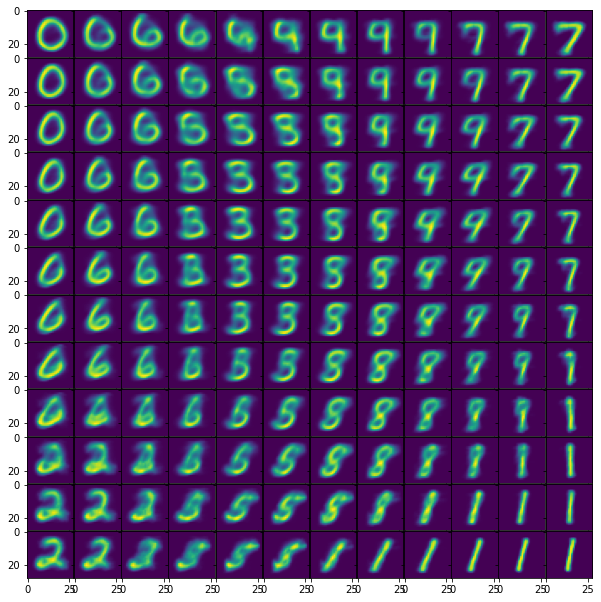

In [27]:
fig, ax = plt.subplots(nrows=M, ncols=M, figsize=(8, 8), sharex = True, sharey = True)
for i in range(M):
    for j in range(M):
        x_val = gauss_x[i,j].item()
        y_val = gauss_y[i,j].item()
        im = conv_vae.decoder(torch.Tensor([y_val, x_val]).unsqueeze(0).unsqueeze(0))
        im_plt = im.squeeze(0).squeeze(0).reshape((28,28))
        plot_me = im_plt.detach().numpy()
        ax[i,j].imshow(plot_me)

slim=0.6
plt.tight_layout(pad=-slim, w_pad=-slim, h_pad=-slim)
plt.show()